In [5]:
import pandas as pd
import datetime
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
font = {'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
#os.chdir("/root/Envs/btc-analysis/btc-price-analysis")
time_format = "%Y-%m-%dT%H:%M:%SZ"

## Weekly sentiment score analysis

this is the dataset of news headline that contains "internet"

In [8]:
score_data = pd.read_csv("../data/nyt_bitcoin_with_score.csv", index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x, time_format))
score_data.head()

,headline,sentiment,sentimentValue
time,,,
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",Negative,1
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",Negative,1
2012-04-12 14:30:13,Canada Seeks to Turn Coins Into Digital Currency,Neutral,2
2013-03-12 20:28:27,Today's Scuttlebot: Bitcoin Problem and Tracki...,Negative,1
2013-04-08 00:00:00,"Bubble or No, This Virtual Currency Is a Lot o...",Negative,1


#### Ratio of "negative", "neutral", "positive"

In [3]:
score_data.sentiment.unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

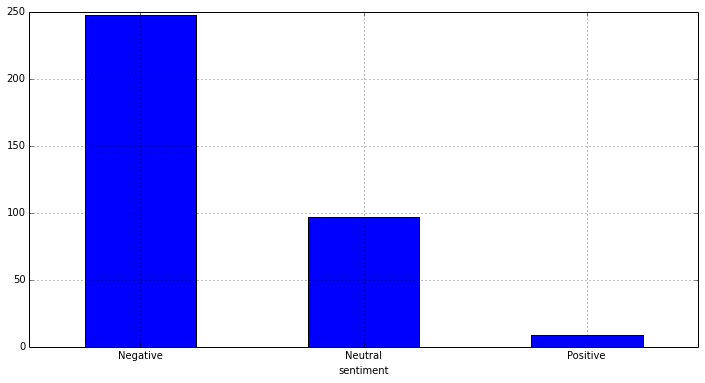

In [30]:
score_data.groupby("sentiment").sentiment.count().plot(kind='bar',rot=0)

Massively negative ratings!!!! Is this special to bitcoin news? To double check, run the same analysis on news with headline including "internet".

#### Alternate news analysis (digress)

In [10]:
internet_news = pd.read_csv("../data/nyt_internet_with_score.csv", index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x, time_format))
internet_news.head()

,headline,sentiment,sentimentValue
time,,,
2012-01-05 00:00:00,Internet Access Is Not a Human Right,Positive,3
2012-01-05 10:34:13,Internet Access Is Not a Human Right,Positive,3
2012-01-05 10:34:13,Internet Access Is Not a Human Right,Positive,3
2012-01-06 00:00:00,Students of Online Schools Are Lagging,Negative,1
2012-01-09 15:50:30,Be Nice on the Internet Week,Positive,3


In [12]:
internet_news.groupby("sentiment").sentiment.count()

sentiment
Negative    527
Neutral     337
Positive    135
Name: sentiment, dtype: int64

So it seems most of news would be classified as negative by the Stanford classifier. How about other classifier?

#### Indico.io sentiment score

Here we analyze the score generated by Indico.io API on the same dataset. The score is between 0 and 1, and scores >0.5 are considered as positive.

In [3]:
indico_news = pd.read_csv("../data/indico_nyt_bitcoin.csv", index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x, time_format))
indico_news.head()

,headline,indico_score
time,,
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.599536
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.599536
2012-04-12 14:30:13,Canada Seeks to Turn Coins Into Digital Currency,0.429367
2013-03-12 20:28:27,Today's Scuttlebot: Bitcoin Problem and Tracki...,0.486258
2013-04-08 00:00:00,"Bubble or No, This Virtual Currency Is a Lot o...",0.469938


Distribution

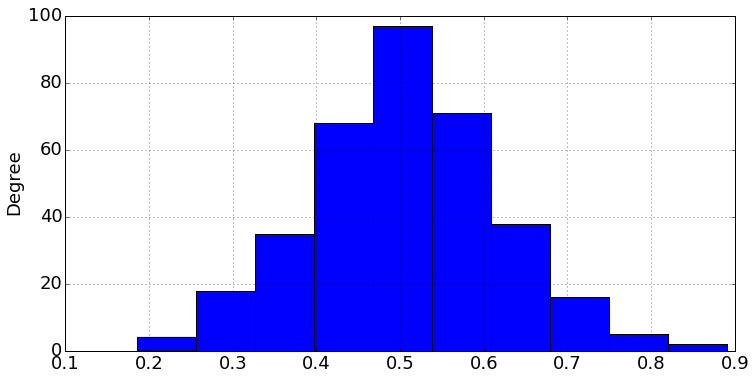

In [6]:
indico_news.indico_score.plot(kind='hist')

The distribution of indico score looks quite like a normal distribution, which is better than the Stanford one of course. So maybe we should try using indico score?

### Weekly distribution

In [4]:
weekly_news_count = score_data.resample('w', how='count').fillna(0)
weekly_news_count.sentiment.describe()

count    168.000000
mean       2.107143
std        4.115162
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       36.000000
Name: sentiment, dtype: float64

#### News distribution by week

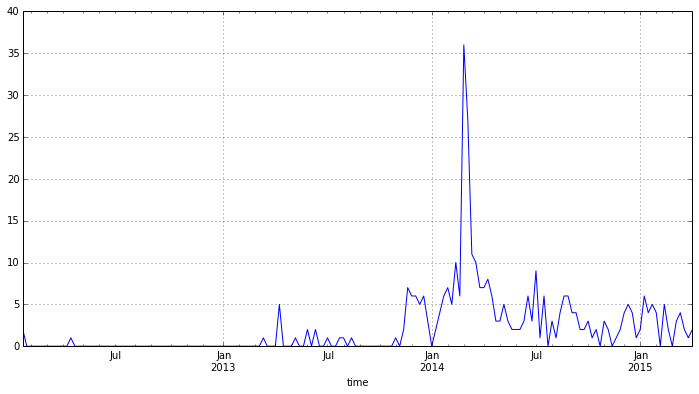

In [5]:
weekly_news_count.sentiment.plot()

#### News distribution

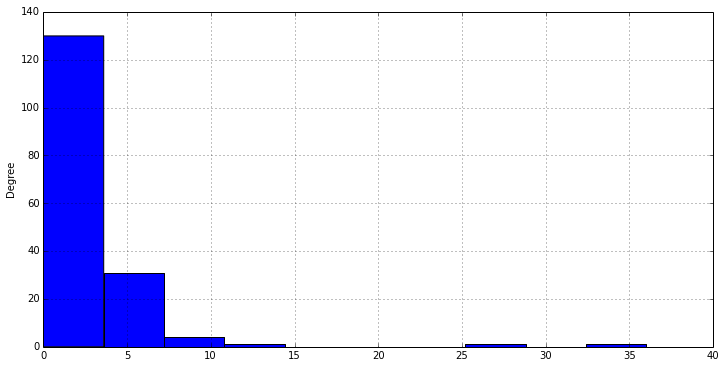

In [6]:
weekly_news_count.sentiment.plot(kind='hist')

## Average weekly sentiment score

In [18]:
weekly_score = score_data.resample('d', how='mean').fillna(0)
weekly_score.head()

,sentimentValue
time,
2012-01-16,1
2012-01-17,0
2012-01-18,0
2012-01-19,0
2012-01-20,0


#### Score Distribution

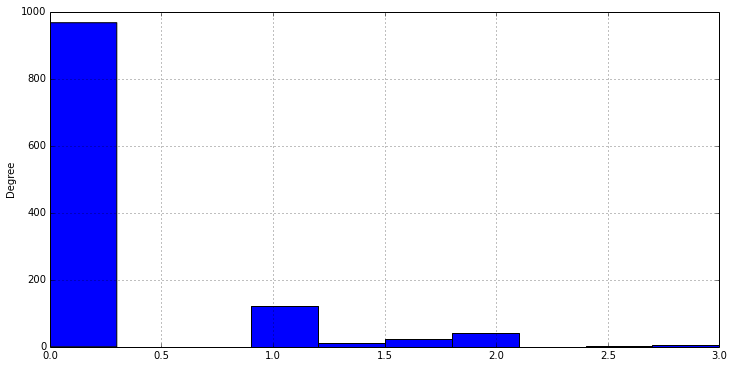

In [19]:
weekly_score.sentimentValue.plot(kind='hist')

#### Score distribution by week

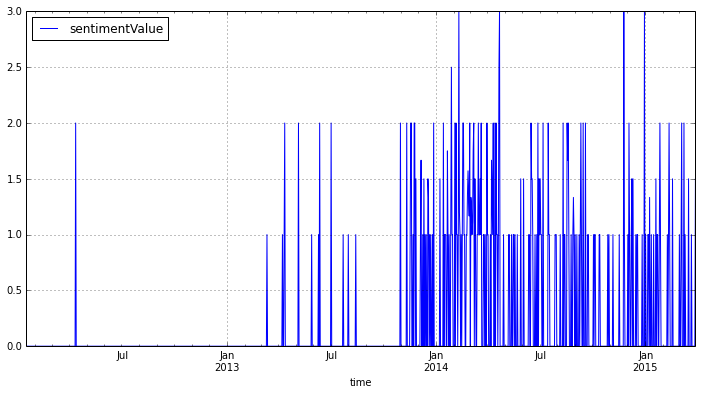

In [20]:
weekly_score.plot()

We miss news about bitcoin for about half of the all time. Therefore we try keyword "internet".

In [21]:
missing_news = 100*weekly_score[weekly_score.sentimentValue==0].count()/float(weekly_score.count())
print "Percentage of weeks without news:  %f%%" % missing_news

Percentage of weeks without news:  82.735043%


## Combine the sentiment score with price data